<a href="https://colab.research.google.com/github/s20488/COV/blob/main/Anastasiia_Ponkratova_CV_L3_sota_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pytorch-lightning

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 801.6/801.6 kB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 841.5/841.5 kB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 35.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 36.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 48.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 1.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 11.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.0/166.0 MB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━

# VGG16

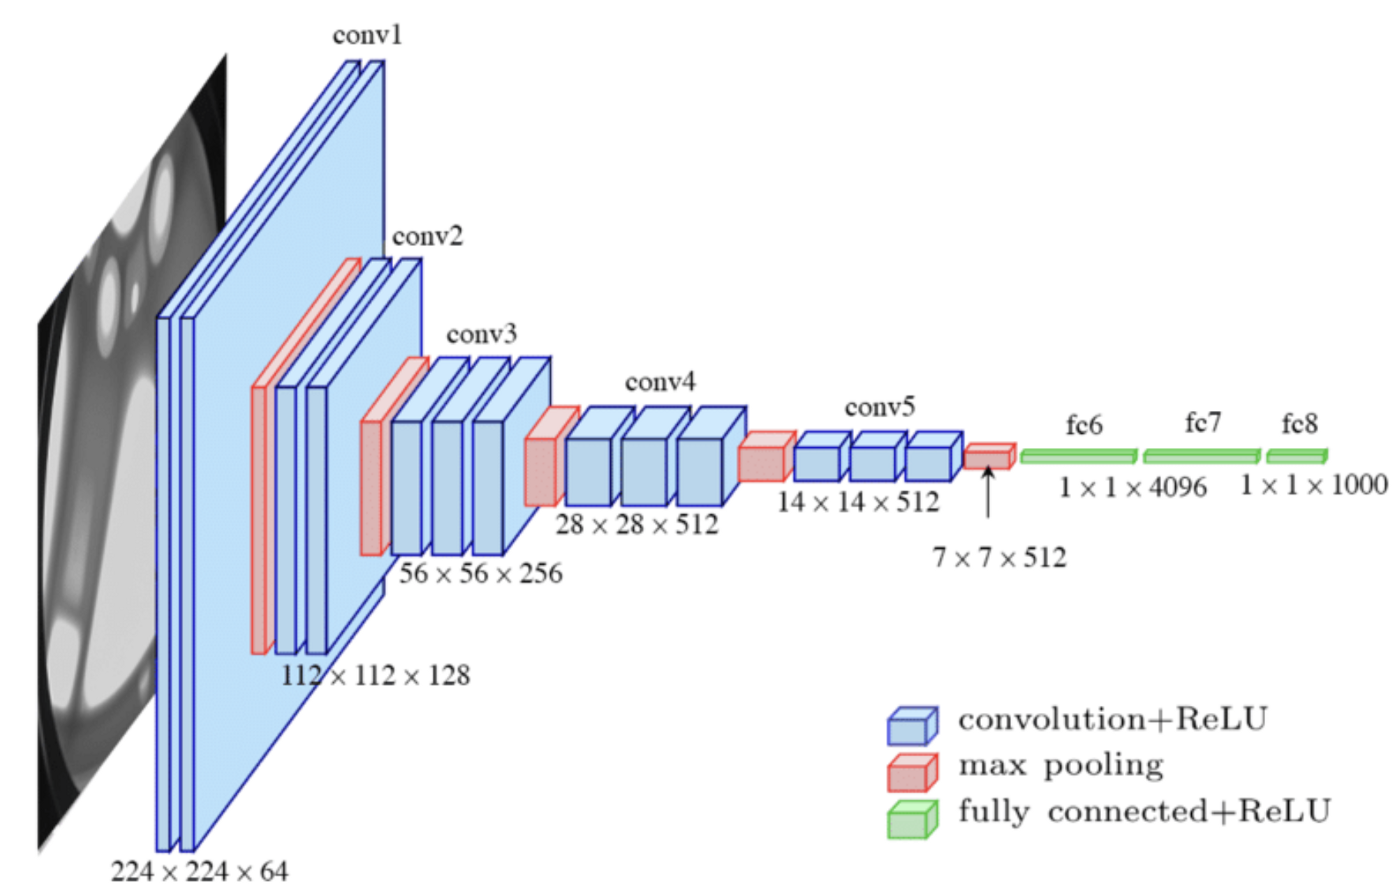

In [ ]:
import pytorch_lightning as pl
from torch import nn
import torchmetrics
import torch.nn.functional as F
from torch import optim

In [ ]:
class VGG16(pl.LightningModule):
  def __init__(self, num_classes):
    super().__init__()

    super(VGG16, self).__init__()
    self.conv1_1 = nn.Conv2d(in_channels=3, out_channels=64, kernel_size=3, padding=1)
    self.conv1_2 = nn.Conv2d(in_channels=64, out_channels=64, kernel_size=3, padding=1)

    self.conv2_1 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, padding=1)
    self.conv2_2 = nn.Conv2d(in_channels=128, out_channels=128, kernel_size=3, padding=1)

    self.conv3_1 = nn.Conv2d(in_channels=128, out_channels=256, kernel_size=3, padding=1)
    self.conv3_2 = nn.Conv2d(in_channels=256, out_channels=256, kernel_size=3, padding=1)
    self.conv3_3 = nn.Conv2d(in_channels=256, out_channels=256, kernel_size=3, padding=1)

    self.conv4_1 = nn.Conv2d(in_channels=256, out_channels=512, kernel_size=3, padding=1)
    self.conv4_2 = nn.Conv2d(in_channels=512, out_channels=512, kernel_size=3, padding=1)
    self.conv4_3 = nn.Conv2d(in_channels=512, out_channels=512, kernel_size=3, padding=1)

    self.conv5_1 = nn.Conv2d(in_channels=512, out_channels=512, kernel_size=3, padding=1)
    self.conv5_2 = nn.Conv2d(in_channels=512, out_channels=512, kernel_size=3, padding=1)
    self.conv5_3 = nn.Conv2d(in_channels=512, out_channels=512, kernel_size=3, padding=1)

    self.maxpool = nn.MaxPool2d(kernel_size=2, stride=2)

    self.fc1 = nn.Linear(25088, 4096)
    self.fc2 = nn.Linear(4096, 4096)
    self.fc3 = nn.Linear(4096, 10)

    self.train_acc = torchmetrics.Accuracy()
    self.val_acc = torchmetrics.Accuracy()

    self.train_macro_f1 = torchmetrics.F1Score(num_classes=num_classes, average='macro')
    self.val_macro_f1 = torchmetrics.F1Score(num_classes=num_classes, average='macro')

  def forward(self, x):
      x = F.relu(self.conv1_1(x))
      x = F.relu(self.conv1_2(x))
      x = self.maxpool(x)
      x = F.relu(self.conv2_1(x))
      x = F.relu(self.conv2_2(x))
      x = self.maxpool(x)
      x = F.relu(self.conv3_1(x))
      x = F.relu(self.conv3_2(x))
      x = F.relu(self.conv3_3(x))
      x = self.maxpool(x)
      x = F.relu(self.conv4_1(x))
      x = F.relu(self.conv4_2(x))
      x = F.relu(self.conv4_3(x))
      x = self.maxpool(x)
      x = F.relu(self.conv5_1(x))
      x = F.relu(self.conv5_2(x))
      x = F.relu(self.conv5_3(x))
      x = self.maxpool(x)
      x = x.reshape(x.shape[0], -1)
      x = F.relu(self.fc1(x))
      x = F.dropout(x, 0.5)
      x = F.relu(self.fc2(x))
      x = F.dropout(x, 0.5)
      x = self.fc3(x)
      return x

  def configure_optimizers(self):
    optimizer =  optim.SGD(self.parameters(), lr = 0.01)
    return optimizer

  def training_step(self, train_batch, batch_idx):
    inputs, labels = train_batch


    outputs = self.forward(inputs.float())
    loss = self.loss_function(outputs, labels)

    self.log('train_loss', loss, on_step= True, on_epoch = True)

    outputs = F.softmax(outputs, dim =1)

    self.train_acc(outputs, labels)
    self.log('train_acc', self.train_acc, on_epoch=True, on_step= False)

    self.train_macro_f1(outputs, labels)
    self.log('train_macro_f1', self.train_macro_f1, on_epoch=True, on_step= False)


    return loss

  def validation_step(self, val_batch, batch_idx):
    inputs, labels = val_batch


    outputs = self.forward(inputs.float())
    loss = self.loss_function(outputs, labels)

    self.log('val_loss', loss,  on_step= True, on_epoch = True)


    outputs = F.softmax(outputs, dim =1)

    self.val_acc(outputs, labels)
    self.log('val_acc', self.val_acc, on_epoch=True, on_step= False)

    self.val_macro_f1(outputs, labels)
    self.log('val_macro_f1', self.val_macro_f1, on_epoch=True, on_step= False)

    return loss

# Inception

In [ ]:
import torch

In [ ]:
class ConvBlock(nn.Module):
    def __init__(self, in_channels, out_chanels, **kwargs):
        super(ConvBlock, self).__init__()
        self.conv = nn.Conv2d(in_channels, out_chanels, **kwargs)
        self.bn = nn.BatchNorm2d(out_chanels)

    def forward(self, x):
        return F.relu(self.bn(self.conv(x)))

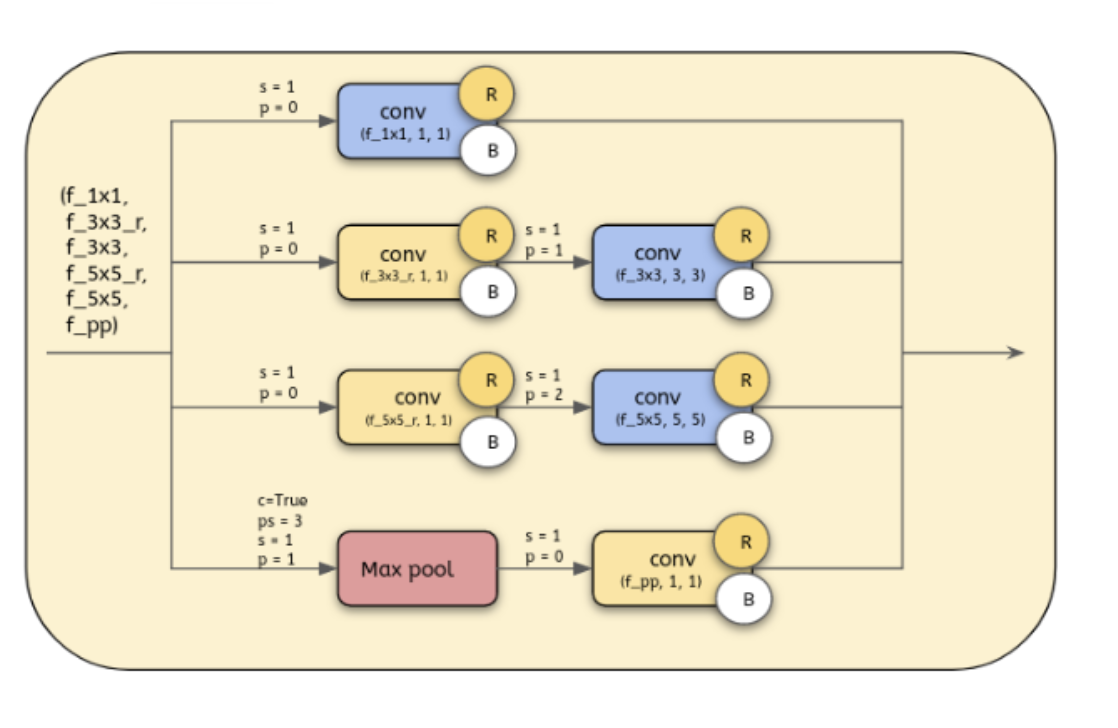

In [ ]:
class InceptionBlock(nn.Module):
    def __init__(
        self,
        in_channels,
        out_1x1,
        red_3x3,
        out_3x3,
        red_5x5,
        out_5x5,
        out_pool,
    ):
        super(InceptionBlock, self).__init__()
        self.branch1 = ConvBlock(in_channels, out_1x1, kernel_size=1)
        self.branch2 = nn.Sequential(
            ConvBlock(in_channels, red_3x3, kernel_size=1, padding=0),
            ConvBlock(red_3x3, out_3x3, kernel_size=3, padding=1),
        )
        self.branch3 = nn.Sequential(
            ConvBlock(in_channels, red_5x5, kernel_size=1),
            ConvBlock(red_5x5, out_5x5, kernel_size=5, padding=2),
        )
        self.branch4 = nn.Sequential(
            nn.MaxPool2d(kernel_size=3, padding=1, stride=1),
            ConvBlock(in_channels, out_pool, kernel_size=1),
        )

    def forward(self, x):
        branches = (self.branch1, self.branch2, self.branch3, self.branch4)
        return torch.cat([branch(x) for branch in branches], 1)

In [ ]:
class InceptionAux(nn.Module):
    def __init__(self, in_channels, num_classes):
        super(InceptionAux, self).__init__()
        self.dropout = nn.Dropout(p=0.7)
        self.pool = nn.AvgPool2d(kernel_size=5, stride=3)
        self.conv = ConvBlock(in_channels, 128, kernel_size=1)
        self.fc1 = nn.Linear(2048, 1024)
        self.fc2 = nn.Linear(1024, num_classes)

    def forward(self, x):
        x = self.pool(x)
        x = self.conv(x)
        x = x.reshape(x.shape[0], -1)
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        return x

In [ ]:
class InceptionV1(pl.LightningModule):
  def __init__(self, aux_logits=True, num_classes=1000):
    super(InceptionV1, self).__init__()
    self.aux_logits = aux_logits
    self.conv1 = ConvBlock(
        in_channels=3,
        out_chanels=64,
        kernel_size=(7, 7),
        stride=(2, 2),
        padding=(3, 3),
    )
    self.conv2 = ConvBlock(64, 192, kernel_size=3, stride=1, padding=1)
    self.maxpool = nn.MaxPool2d(kernel_size=3, stride=2, padding=1)
    self.inception3a = InceptionBlock(192, 64, 96, 128, 16, 32, 32)
    self.inception3b = InceptionBlock(256, 128, 128, 192, 32, 96, 64)
    self.inception4a = InceptionBlock(480, 192, 96, 208, 16, 48, 64)
    self.inception4b = InceptionBlock(512, 160, 112, 224, 24, 64, 64)
    self.inception4c = InceptionBlock(512, 128, 128, 256, 24, 64, 64)
    self.inception4d = InceptionBlock(512, 112, 144, 288, 32, 64, 64)
    self.inception4e = InceptionBlock(528, 256, 160, 320, 32, 128, 128)
    self.inception5a = InceptionBlock(832, 256, 160, 320, 32, 128, 128)
    self.inception5b = InceptionBlock(832, 384, 192, 384, 48, 128, 128)
    self.avgpool = nn.AvgPool2d(kernel_size=7, stride=1)
    self.dropout = nn.Dropout(p=0.4)
    self.fc = nn.Linear(1024, num_classes)

    if self.aux_logits:
        self.aux1 = InceptionAux(512, num_classes)
        self.aux2 = InceptionAux(528, num_classes)
    else:
        self.aux1 = self.aux2 = None

    self.train_acc = torchmetrics.Accuracy()
    self.val_acc = torchmetrics.Accuracy()

    self.train_macro_f1 = torchmetrics.F1Score(num_classes=num_classes, average='macro')
    self.val_macro_f1 = torchmetrics.F1Score(num_classes=num_classes, average='macro')

  def forward(self, x):
        x = self.conv1(x)
        x = self.maxpool(x)
        x = self.conv2(x)
        x = self.maxpool(x)
        x = self.inception3a(x)
        x = self.inception3b(x)
        x = self.maxpool(x)
        x = self.inception4a(x)

        if self.aux_logits and self.training: # wykorzysujemy auxilary classifiers tylko podczas treningu
            aux1 = self.aux1(x)

        x = self.inception4b(x)
        x = self.inception4c(x)
        x = self.inception4d(x)

        if self.aux_logits and self.training: # wykorzysujemy auxilary classifiers tylko podczas treningu
            aux2 = self.aux2(x)

        x = self.inception4e(x)
        x = self.maxpool(x)
        x = self.inception5a(x)
        x = self.inception5b(x)
        x = self.avgpool(x)
        x = x.reshape(x.shape[0], -1)
        x = self.dropout(x)
        x = self.fc(x)

        if self.aux_logits and self.training: # wykorzysujemy auxilary classifiers tylko podczas treningu
            return aux1, aux2, x
        return x

  def configure_optimizers(self):
    optimizer =  optim.SGD(self.parameters(), lr = 0.01)
    return optimizer

  def training_step(self, train_batch, batch_idx):
    inputs, labels = train_batch


    aux1, aux2, outputs = self.forward(inputs.float()) # model podczas treningu zwraca 3 outputy - 2 z auxiliary classifiers i 1 końcowy

    #liczymy funkcje błedu dla wszystkich 3 outputów
    aux1_loss = self.loss_function(aux1, labels)
    aux2_loss = self.loss_function(aux2, labels)
    output_loss = self.loss_function(outputs, labels)

    #ostateczna funkcja błedu jest sumą funkcji błędu dla wszyskich outputów
    loss = aux1_loss + aux2_loss + output_loss

    self.log('train_loss', loss, on_step= True, on_epoch = True)

    outputs = F.softmax(outputs, dim =1)

    self.train_acc(outputs, labels)
    self.log('train_acc', self.train_acc, on_epoch=True, on_step= False)

    self.train_macro_f1(outputs, labels)
    self.log('train_macro_f1', self.train_macro_f1, on_epoch=True, on_step= False)


    return loss

  def validation_step(self, val_batch, batch_idx):
    inputs, labels = val_batch


    outputs = self.forward(inputs.float())
    loss = self.loss_function(outputs, labels)

    self.log('val_loss', loss,  on_step= True, on_epoch = True)


    outputs = F.softmax(outputs, dim =1)

    self.val_acc(outputs, labels)
    self.log('val_acc', self.val_acc, on_epoch=True, on_step= False)

    self.val_macro_f1(outputs, labels)
    self.log('val_macro_f1', self.val_macro_f1, on_epoch=True, on_step= False)

    return loss

# ResNet

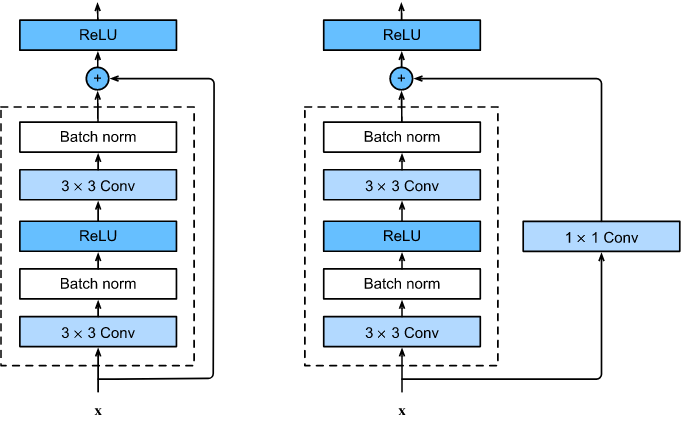

In [ ]:
class ResBlock(nn.Module):
    def __init__(self, in_channels, out_channels, downsample):
        super().__init__()
        if downsample:
            self.conv1 = nn.Conv2d(in_channels, out_channels, kernel_size=3, stride=2, padding=1)
            self.shortcut = nn.Sequential(
                nn.Conv2d(in_channels, out_channels, kernel_size=1, stride=2),
                nn.BatchNorm2d(out_channels)
            )
        else:
            self.conv1 = nn.Conv2d(in_channels, out_channels, kernel_size=3, stride=1, padding=1)
            self.shortcut = nn.Sequential()

        self.conv2 = nn.Conv2d(out_channels, out_channels, kernel_size=3, stride=1, padding=1)
        self.bn1 = nn.BatchNorm2d(out_channels)
        self.bn2 = nn.BatchNorm2d(out_channels)

    def forward(self, input):
        shortcut = self.shortcut(input)
        input = nn.ReLU()(self.bn1(self.conv1(input)))
        input = nn.ReLU()(self.bn2(self.conv2(input)))
        input = input + shortcut
        return nn.ReLU()(input)

In [ ]:
class InceptionV1(pl.LightningModule):
  def __init__(self, in_channels, resblock, outputs=1000):
    super().__init__()
    self.layer0 = nn.Sequential(
        nn.Conv2d(in_channels, 64, kernel_size=7, stride=2, padding=3),
        nn.MaxPool2d(kernel_size=3, stride=2, padding=1),
        nn.BatchNorm2d(64),
        nn.ReLU()
    )

    self.layer1 = nn.Sequential(
        resblock(64, 64, downsample=False),
        resblock(64, 64, downsample=False)
    )

    self.layer2 = nn.Sequential(
        resblock(64, 128, downsample=True),
        resblock(128, 128, downsample=False)
    )

    self.layer3 = nn.Sequential(
        resblock(128, 256, downsample=True),
        resblock(256, 256, downsample=False)
    )


    self.layer4 = nn.Sequential(
        resblock(256, 512, downsample=True),
        resblock(512, 512, downsample=False)
    )

    self.gap = torch.nn.AdaptiveAvgPool2d(1)
    self.fc = torch.nn.Linear(512, outputs)

  def forward(self, x):
        x = self.layer0(x)
        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        x = self.layer4(x)
        x = self.gap(x)
        x = torch.flatten(x)
        x = self.fc(x)

        return x

  def configure_optimizers(self):
    optimizer =  optim.SGD(self.parameters(), lr = 0.01)
    return optimizer

  def training_step(self, train_batch, batch_idx):
    inputs, labels = train_batch


    outputs = self.forward(inputs.float())
    loss = self.loss_function(outputs, labels)

    self.log('train_loss', loss, on_step= True, on_epoch = True)

    outputs = F.softmax(outputs, dim =1)

    self.train_acc(outputs, labels)
    self.log('train_acc', self.train_acc, on_epoch=True, on_step= False)

    self.train_macro_f1(outputs, labels)
    self.log('train_macro_f1', self.train_macro_f1, on_epoch=True, on_step= False)


    return loss

  def validation_step(self, val_batch, batch_idx):
    inputs, labels = val_batch


    outputs = self.forward(inputs.float())
    loss = self.loss_function(outputs, labels)

    self.log('val_loss', loss,  on_step= True, on_epoch = True)


    outputs = F.softmax(outputs, dim =1)

    self.val_acc(outputs, labels)
    self.log('val_acc', self.val_acc, on_epoch=True, on_step= False)

    self.val_macro_f1(outputs, labels)
    self.log('val_macro_f1', self.val_macro_f1, on_epoch=True, on_step= False)

    return loss

# Transfer Learning

## Pobieranie danych

https://www.kaggle.com/datasets/alessiocorrado99/animals10

In [ ]:
from google.colab import drive

In [ ]:
!pip3 install --upgrade gdown

  Attempting uninstall: gdown
    Found existing installation: gdown 4.7.3
    Uninstalling gdown-4.7.3:
      Successfully uninstalled gdown-4.7.3


In [ ]:
!gdown 1WKDTw02e504JR5gPBjECQEFWLCLehGaa

Downloading...
From (original): https://drive.google.com/uc?id=1WKDTw02e504JR5gPBjECQEFWLCLehGaa
From (redirected): https://drive.google.com/uc?id=1WKDTw02e504JR5gPBjECQEFWLCLehGaa&confirm=t&uuid=04a2f5fc-5218-499f-b8ee-6f5435c9d572
To: /content/archive.zip
100% 614M/614M [00:10<00:00, 59.0MB/s]


In [ ]:
!unzip archive.zip

Streaming output truncated to the last 5000 lines.
  inflating: raw-img/ragno/OIP-MVQChNQpHiMZEVMPehrvoAHaE6.jpeg  
  inflating: raw-img/ragno/OIP-MVdIFDAFpNyK_XCpwkDIWgHaFj.jpeg  
  inflating: raw-img/ragno/OIP-MYY_8k5AHqMJwTCNXfH6rwHaFj.jpeg  
  inflating: raw-img/ragno/OIP-MZEVXuoMsATG8u_UuTQ6hAHaE8.jpeg  
  inflating: raw-img/ragno/OIP-MZg0tznDRE95AMfyuutuYAHaE6.jpeg  
  inflating: raw-img/ragno/OIP-M_r9DkR2X5gP0P5-z8wPYQHaE7.jpeg  
  inflating: raw-img/ragno/OIP-M_xDUSzjlF3-w9XHCm93cgHaFF.jpeg  
  inflating: raw-img/ragno/OIP-MbI4-bMyutRX3X382IAVcQAAAA.jpeg  
  inflating: raw-img/ragno/OIP-MbMksZdD7gomsC9fd6cpKgHaHJ.jpeg  
  inflating: raw-img/ragno/OIP-Md4AMcvjaHcivJqeW06wEwHaFW.jpeg  
  inflating: raw-img/ragno/OIP-MgCgailkT5XkO1XczzQCngHaLK.jpeg  
  inflating: raw-img/ragno/OIP-MgrKq05YHGXsgj1AmYIyJQHaE8.jpeg  
  inflating: raw-img/ragno/OIP-MhRGx7d8nbnHBuqrsO00EQHaFo.jpeg  
  inflating: raw-img/ragno/OIP-MiVgMXcKGQdog2KGe7i0YQHaHh.jpeg  
  inflating: raw-img/ragno/OIP-Mis0lJf3

## Wczytywanie danych

In [ ]:
from torchvision.datasets import ImageFolder
from torch.utils.data import random_split, DataLoader
from torchvision import transforms

In [ ]:
class AnimalsDatamodule(pl.LightningDataModule):
  def __init__(self, batch_size = 32):
    super().__init__()
    self.batch_size = batch_size
  def setup(self, stage = None):
    transform = transforms.Compose([
                                    transforms.CenterCrop(200),
                                    transforms.ToTensor(),
                                    transforms.Normalize((0), (1))
                                ])

    dataset = ImageFolder(root='raw-img/', transform=transform)
    print(len(dataset))
    self.train_dataset, self.test_dataset = random_split(dataset, [len(dataset)- len(dataset)//4, len(dataset)//4])


  def train_dataloader(self):
    return  DataLoader(self.train_dataset, batch_size = self.batch_size, shuffle = True)
  def val_dataloader(self):
    return  DataLoader(self.test_dataset, batch_size = self.batch_size, shuffle = False)

In [ ]:
dm = AnimalsDatamodule()
dm.setup()

26179


# Zadania

## Zadanie 1
Załaduj już wytrenowany model vgg16 z biblioteki torchvision - uzupełnij klasę AnimalsModel.

## Model

Wytrenowane modele dostępne są w torchvision.models

In [ ]:
import torchvision.models as models

In [ ]:
model = models.vgg16(pretrained=True)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Ładujemy model pretrenowany model

In [ ]:
models.resnet50(pretrained=True)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [ ]:
class AnimalsModel(pl.LightningModule):
  def __init__(self, num_classes=10):
    super().__init__()

    # bierzemy z pre-trenowanego modelu tylko warstwy splotowe i pooling, klasyfikator trenujemy od zera
    self.backbone = model.features # TODO
    self.pooling = nn.AdaptiveAvgPool2d((1, 1)) # TODO

    # 2 warstwy liniowe - warstwa ukryta - 500 neuronów
    self.fc1 = nn.Linear(512, 500) # TODO
    self.fc2 = nn.Linear(500, num_classes) # TODO

    self.loss_function = nn.CrossEntropyLoss()


    self.train_acc = torchmetrics.Accuracy(task="multiclass", num_classes=num_classes)
    self.val_acc = torchmetrics.Accuracy(task="multiclass", num_classes=num_classes)

    self.train_macro_f1 = torchmetrics.F1Score(num_classes=num_classes, task="multiclass", average='macro')
    self.val_macro_f1 = torchmetrics.F1Score(num_classes=num_classes, task="multiclass", average='macro')

  def forward(self, x):
      self.backbone.eval()
      with torch.no_grad(): # Ustaw, żeby dla danych warstw nie był liczony gradient
          x = self.backbone(x)
          x = self.pooling(x).flatten(1)

      x = self.fc1(x)
      x = F.relu(x)
      x = self.fc2(x)

      return x

  def configure_optimizers(self):
    optimizer =  optim.Adam(self.parameters(), lr = 0.0001)
    return optimizer

  def training_step(self, train_batch, batch_idx):
    inputs, labels = train_batch


    outputs = self.forward(inputs.float())
    loss = self.loss_function(outputs, labels)

    self.log('train_loss', loss, on_step= True, on_epoch = True)

    outputs = F.softmax(outputs, dim =1)

    self.train_acc(outputs, labels)
    self.log('train_acc', self.train_acc, on_epoch=True, on_step= False)

    self.train_macro_f1(outputs, labels)
    self.log('train_macro_f1', self.train_macro_f1, on_epoch=True, on_step= False)


    return loss

  def validation_step(self, val_batch, batch_idx):
    inputs, labels = val_batch

    outputs = self.forward(inputs.float())
    loss = self.loss_function(outputs, labels)

    self.log('val_loss', loss,  on_step= True, on_epoch = True)

    outputs = F.softmax(outputs, dim =1)

    self.val_acc(outputs, labels)
    self.log('val_acc', self.val_acc, on_epoch=True, on_step= False)

    self.val_macro_f1(outputs, labels)
    self.log('val_macro_f1', self.val_macro_f1, on_epoch=True, on_step= False)

    return loss

In [ ]:
model = AnimalsModel()

In [ ]:
from pytorch_lightning.loggers import TensorBoardLogger

In [ ]:
logger = TensorBoardLogger("lightning_logs", name="model")

In [ ]:
trainer = pl.Trainer(logger = logger, max_epochs = 15, log_every_n_steps =1)

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


In [ ]:
trainer.fit(model, dm)

INFO:pytorch_lightning.callbacks.model_summary:
  | Name           | Type               | Params
------------------------------------------------------
0 | backbone       | Sequential         | 14.7 M
1 | pooling        | AdaptiveAvgPool2d  | 0     
2 | fc1            | Linear             | 256 K 
3 | fc2            | Linear             | 5.0 K 
4 | loss_function  | CrossEntropyLoss   | 0     
5 | train_acc      | MulticlassAccuracy | 0     
6 | val_acc        | MulticlassAccuracy | 0     
7 | train_macro_f1 | MulticlassF1Score  | 0     
8 | val_macro_f1   | MulticlassF1Score  | 0     
------------------------------------------------------
15.0 M    Trainable params
0         Non-trainable params
15.0 M    Total params
59.905    Total estimated model params size (MB)


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/pytorch_lightning/trainer/call.py:54: Detected KeyboardInterrupt, attempting graceful shutdown...


In [ ]:
%load_ext tensorboard
%tensorboard --logdir lightning_logs

## Zadanie 2
Wytrenuj analogogiczny model o architekturze ResNet

In [ ]:
class AnimalsModel(pl.LightningModule):
  def __init__(self, num_classes=10):
    super().__init__()

    # TODO bierzemy z pre-trenowanego modelu tylko warstwy splotowe i pooling, klasyfikator trenujemy od zera
    model = models.resnet50(pretrained=True)

    self.backbone = nn.Sequential(*list(model.children())[:-2])
    self.pooling = nn.AdaptiveAvgPool2d((1, 1))

    self.fc1 = nn.Linear(2048, 500)
    self.fc2 = nn.Linear(500, num_classes)

    self.loss_function = nn.CrossEntropyLoss()


    self.train_acc = torchmetrics.Accuracy(task="multiclass", num_classes=num_classes)
    self.val_acc = torchmetrics.Accuracy(task="multiclass", num_classes=num_classes)

    self.train_macro_f1 = torchmetrics.F1Score(num_classes=num_classes, task="multiclass", average='macro')
    self.val_macro_f1 = torchmetrics.F1Score(num_classes=num_classes, task="multiclass", average='macro')

  def forward(self, x):
      self.backbone.eval()
      with torch.no_grad(): # Ustaw, żeby dla danych warstw nie był liczony gradient
          x = self.backbone(x)
          x = self.pooling(x).flatten(1)

      x = self.fc1(x)
      x = F.relu(x)
      x = self.fc2(x)

      return x

  def configure_optimizers(self):
    optimizer =  optim.Adam(self.parameters(), lr = 0.0001)
    return optimizer

  def training_step(self, train_batch, batch_idx):
    inputs, labels = train_batch


    outputs = self.forward(inputs.float())
    loss = self.loss_function(outputs, labels)

    self.log('train_loss', loss, on_step= True, on_epoch = True)

    outputs = F.softmax(outputs, dim =1)

    self.train_acc(outputs, labels)
    self.log('train_acc', self.train_acc, on_epoch=True, on_step= False)

    self.train_macro_f1(outputs, labels)
    self.log('train_macro_f1', self.train_macro_f1, on_epoch=True, on_step= False)


    return loss

  def validation_step(self, val_batch, batch_idx):
    inputs, labels = val_batch


    outputs = self.forward(inputs.float())
    loss = self.loss_function(outputs, labels)

    self.log('val_loss', loss,  on_step= True, on_epoch = True)


    outputs = F.softmax(outputs, dim =1)

    self.val_acc(outputs, labels)
    self.log('val_acc', self.val_acc, on_epoch=True, on_step= False)

    self.val_macro_f1(outputs, labels)
    self.log('val_macro_f1', self.val_macro_f1, on_epoch=True, on_step= False)

    return loss

## Zadanie 3

Uzupełnij przekształcenia dla danych treningowych i testowych,

Dla train z augmentacją:
- [ ] przytnij z wyśrodkowaniem do rozmiaru 200
- [ ] przekształć na tensor
- [ ] losowo obróć w pionie z prawdopodobieństwem 0.5
- [ ] losowo obróć o 30 stopni
- [ ] znormalizuj do przedziału 0-1

Dla test bez augmentacji:
- [ ] przytnij z wyśrodkowaniem do rozmiaru 200
- [ ] przekształć na tensor
- [ ] znormalizuj do przedziału 0-1

# Augmentacja

Możemy sztucznie "zwiększyć" ilośc danych treningowych poprzez dokonywanie augmentacji - operacji przekształcających obrazy. Przykładowe augmentacje to np. obrót obrazu albo utworzenie jego lustrzanego odbicia. Dokonywanie augmentacji wpływa pozytywnie n regularyzacje sieci, zwiększając róznorodnośc zbioru treningowego

In [ ]:
from copy import copy
from torch.utils.data import Dataset

In [ ]:
from torchvision.transforms import RandomVerticalFlip, RandomRotation, Normalize, ToTensor, CenterCrop

Tworzymy pomocniczną klase datasetu która pozawala nam zdefiniować augmentacje

In [ ]:
class DatasetFromSubset(Dataset):
    def __init__(self, subset, transform=None):
        self.subset = subset
        self.transform = transform # TODO

    def __getitem__(self, index):
        x, y = self.subset[index]
        if self.transform:
            x = self.transform(x) # przekształć x
        return x, y

    def __len__(self):
        return len(self.subset)

In [ ]:
class AnimalsAugmentedDatamodule(pl.LightningDataModule):
  def __init__(self, batch_size = 32):
    super().__init__()
    self.batch_size = batch_size
  def setup(self, stage = None):
    train_transform = transforms.Compose([
                                    CenterCrop(200),
                                    ToTensor(),
                                    RandomVerticalFlip(p=0.5),
                                    RandomRotation(30),
                                    Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)) # TODO
                                ])

    test_transform = transforms.Compose([
                                    CenterCrop(200),
                                    ToTensor(),
                                    Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
                                ]) # TODO

    dataset = ImageFolder(root='raw-img/')
    self.train_dataset, self.test_dataset = random_split(dataset, [ len(dataset)- len(dataset)//4, len(dataset)//4])

    self.train_dataset = DatasetFromSubset(self.train_dataset, transform = train_transform)
    self.test_dataset = DatasetFromSubset(self.test_dataset, transform = test_transform)


  def train_dataloader(self):
    return  DataLoader(self.train_dataset, batch_size = self.batch_size, shuffle = True)
  def val_dataloader(self):
    return  DataLoader(self.test_dataset, batch_size = self.batch_size, shuffle = False)

In [ ]:
dm = AnimalsAugmentedDatamodule()

In [ ]:
dm.setup()

In [ ]:
image = dm.train_dataset[2][0]

In [ ]:
image = image.permute(1, 2, 0)

In [ ]:
import matplotlib.pyplot as plt

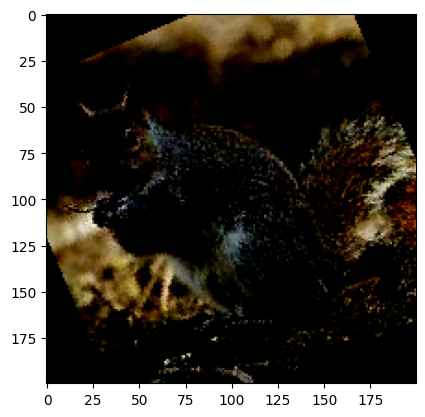

In [ ]:
plt.imshow(image)

# Biblioteki

https://github.com/albumentations-team/albumentations


https://rwightman.github.io/pytorch-image-models/